## Visualizing Earnings Based On College Majors

In this project, we'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).


Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. The full list and details of each feature can be subtracted from the original repo. As part of the objectives, while using visualizations, we can start to explore questions from the dataset like:

- Do students in more popular majors make more money?
- How many majors are predominantly male? Predominantly female?
- Which category of majors have the most students?

### Importing and cleaning dataset

Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.  Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [1]:
# Code (Importing and exploring dataset) #

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]
print('First rows of the dataset:\n', recent_grads.head())
print('Last rows of the dataset:\n', recent_grads.tail())
print('Description of the dataset:\n', recent_grads.describe())
print('Info of the dataset:\n', recent_grads.info())

First rows of the dataset:
    Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   

       Men    Women Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0    Engineering    0.120564           36      1976   
1    679.0     77.0    Engineering    0.101852            7       640   
2    725.0    131.0    Engineering    0.153037            3       648   
3   1123.0    135.0    Engineering    0.107313           16       758   
4  21239.0  11021.0    Engineering    0.341631          289     25694   

       ...        Part_time  Full_time_year_round  Unemployed  \
0      ...       

In [2]:
# Code (Removing null values) #

raw_data_count = recent_grads.shape[0] # Number of total rows in dataset
recent_grads = recent_grads.dropna(axis='index')
cleaned_data_count = recent_grads.shape[0] # Number of total rows in dataset after cleaning null values
print('Number of rows before cleaning:\n', raw_data_count)
print('Number of rows after cleaning:\n', cleaned_data_count)
print('Info of the dataset:\n', recent_grads.info())

Number of rows before cleaning:
 173
Number of rows after cleaning:
 172
<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 172
Data columns (total 21 columns):
Rank                    172 non-null int64
Major_code              172 non-null int64
Major                   172 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          172 non-null object
ShareWomen              172 non-null float64
Sample_size             172 non-null int64
Employed                172 non-null int64
Full_time               172 non-null int64
Part_time               172 non-null int64
Full_time_year_round    172 non-null int64
Unemployed              172 non-null int64
Unemployment_rate       172 non-null float64
Median                  172 non-null int64
P25th                   172 non-null int64
P75th                   172 non-null int64
College_jobs            172 non-null

Now the dataset is already cleaned, we can start with the visualization of data.

### Visualization: Scatter plots in pandas

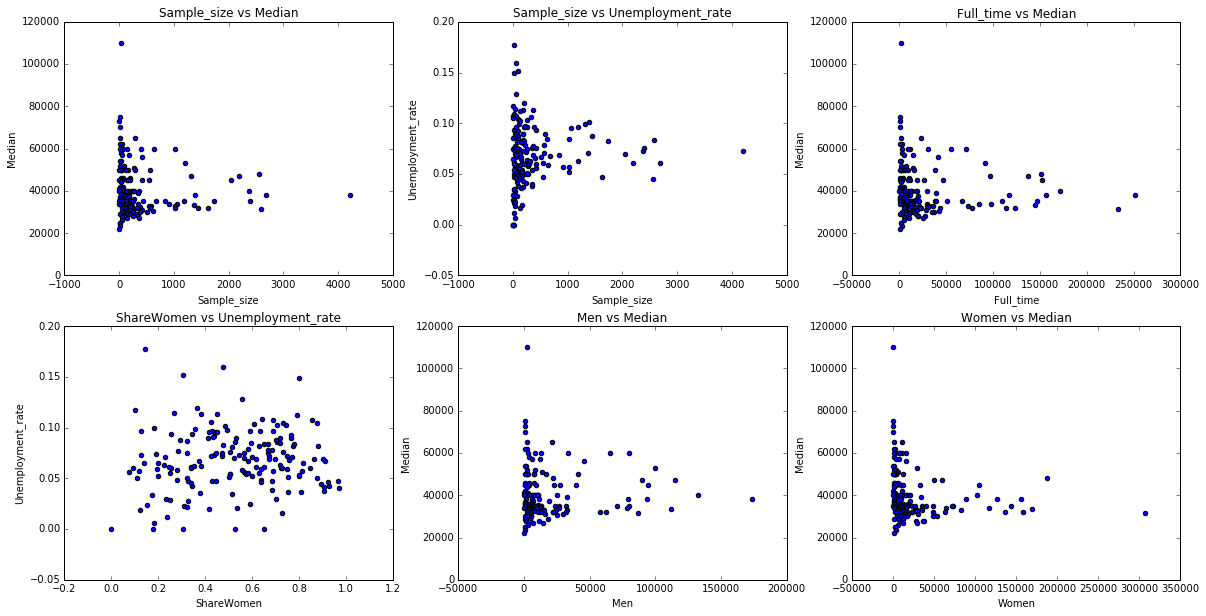

In [3]:
# Code (Scatter plots) #

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,10))

recent_grads.plot(ax=axes[0,0], x='Sample_size', y='Median', kind='scatter', title='Sample_size vs Median')
recent_grads.plot(ax=axes[0,1], x='Sample_size', y='Unemployment_rate', kind='scatter', title='Sample_size vs Unemployment_rate')
recent_grads.plot(ax=axes[0,2], x='Full_time', y='Median', kind='scatter', title='Full_time vs Median')
recent_grads.plot(ax=axes[1,0], x='ShareWomen', y='Unemployment_rate', kind='scatter', title='ShareWomen vs Unemployment_rate')
recent_grads.plot(ax=axes[1,1], x='Men', y='Median', kind='scatter', title='Men vs Median')
recent_grads.plot(ax=axes[1,2], x='Women', y='Median', kind='scatter', title='Women vs Median')

Analyzing the results, we can extract some information:

- The most popular majors are the ones with higher `sample_size` values. We can extract that these majors are not the best paid looking at the _Sample size vs Median_ plot, in fact, is quite the opposite. However, there is a disadventage for this kind of not so popular majors, and it is the fact that they have higher unemployement rates.
- We can extract that there is no connection or correlation between the majors in subjects with or without majority female in terms of unemployement rates, looking at the _Share Women vs Unemployement Rate_ plot.
- For the pair between the number of full-time employees and the median salary, we can see that the conclusions are very similar with the popularity of the majors: the best paid jobs are the ones with less number of employees.
- Looking at the graphs for the comparison in _Men/Women vs Salary_, we can extract that there are no significant differences between the salary of the different genders. These differences in terms of money correspond exclusively to the kind of job.

### Visualization: Histogram plots in pandas

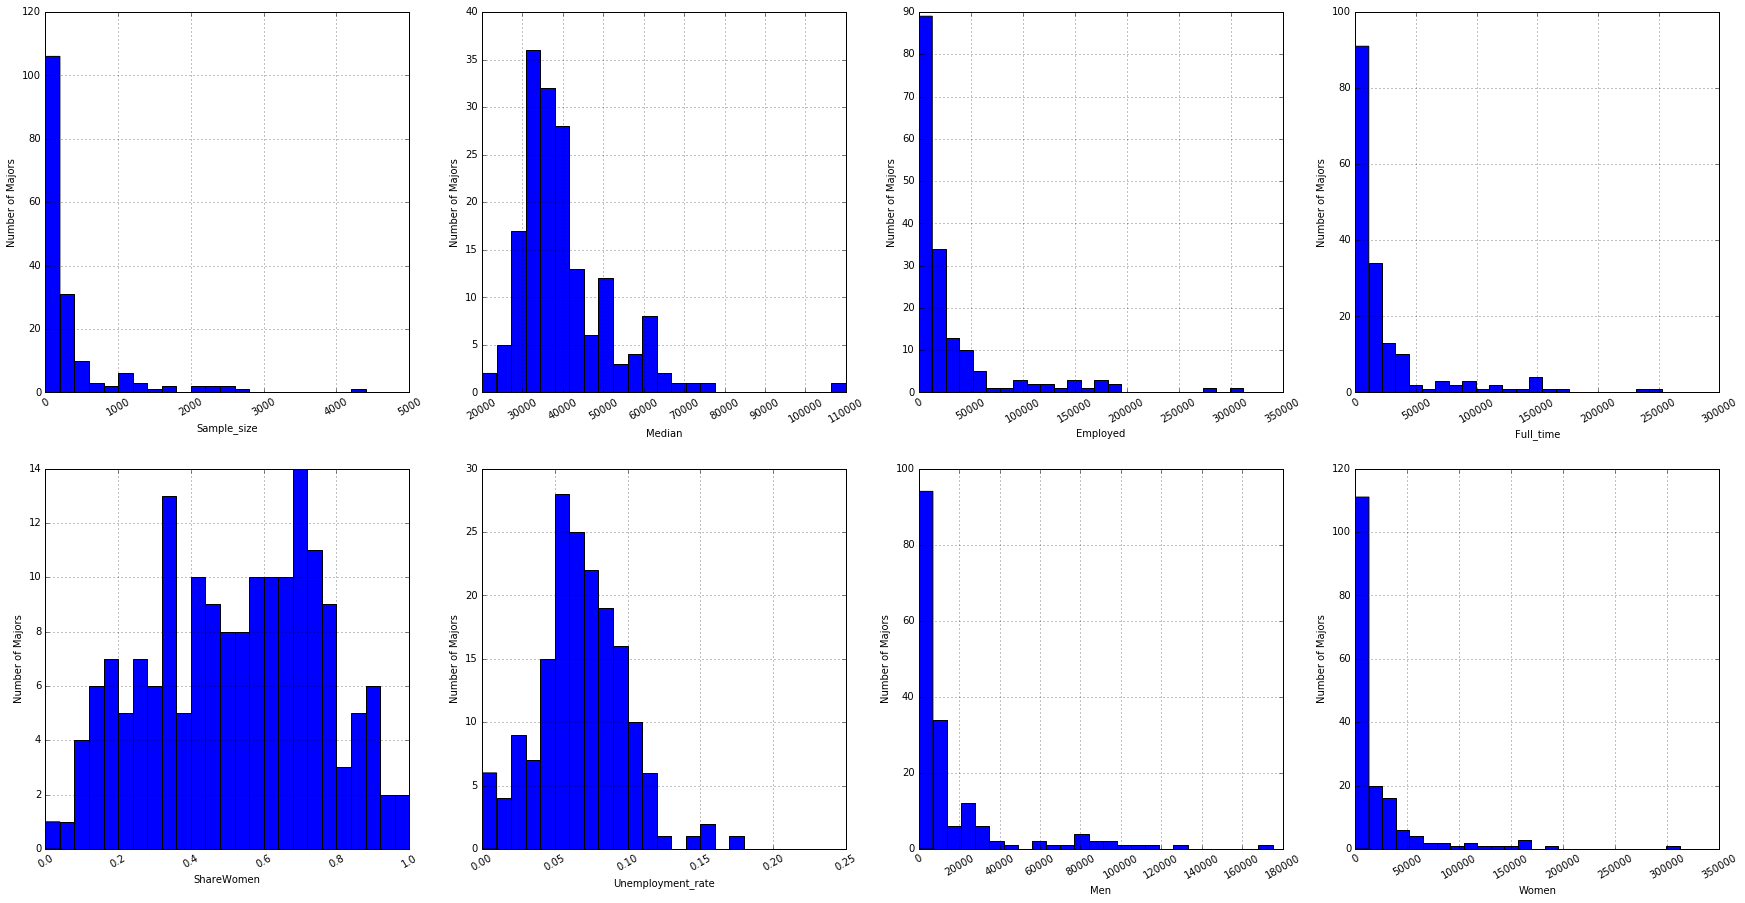

In [4]:
# Code (Histogram plots) #

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(30,15))

recent_grads['Sample_size'].hist(ax=axes[0,0] , bins=25, range=(0,5000), xrot=30)
recent_grads['Median'].hist(ax=axes[0,1] , bins=25, range=(20000,110000), xrot=30)
recent_grads['Employed'].hist(ax=axes[0,2] , bins=25, range=(0,325000), xrot=30)
recent_grads['Full_time'].hist(ax=axes[0,3] , bins=25, range=(0,275000), xrot=30)
recent_grads['ShareWomen'].hist(ax=axes[1,0] , bins=25, range=(0,1), xrot=30)
recent_grads['Unemployment_rate'].hist(ax=axes[1,1] , bins=25, range=(0,0.25), xrot=30)
recent_grads['Men'].hist(ax=axes[1,2] , bins=25, range=(0,175000), xrot=30)
recent_grads['Women'].hist(ax=axes[1,3] , bins=25, range=(0,325000), xrot=30)

names = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
i = 0
for ax in axes.flatten():
    ax.set_ylabel('Number of Majors')
    ax.set_xlabel(names[i])
    i +=1

These histograms help us to visualize the distributions of the individual columns treated.


### Visualization: Scatter Matrix plots in pandas

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f6fc996d8>,
      dtype=object)

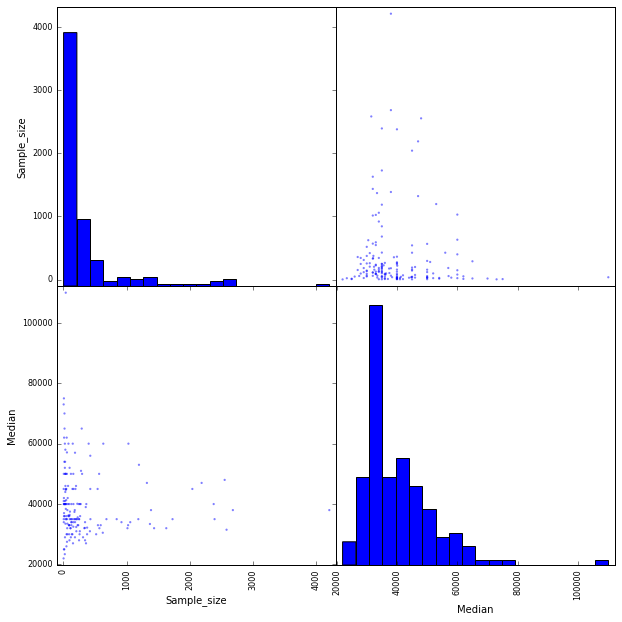

In [5]:
# Code (Scatter Matrix plots) #

pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median']], grid=True, hist_kwds={'bins':20}, figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f6c2657b8>,
      dtype=object)

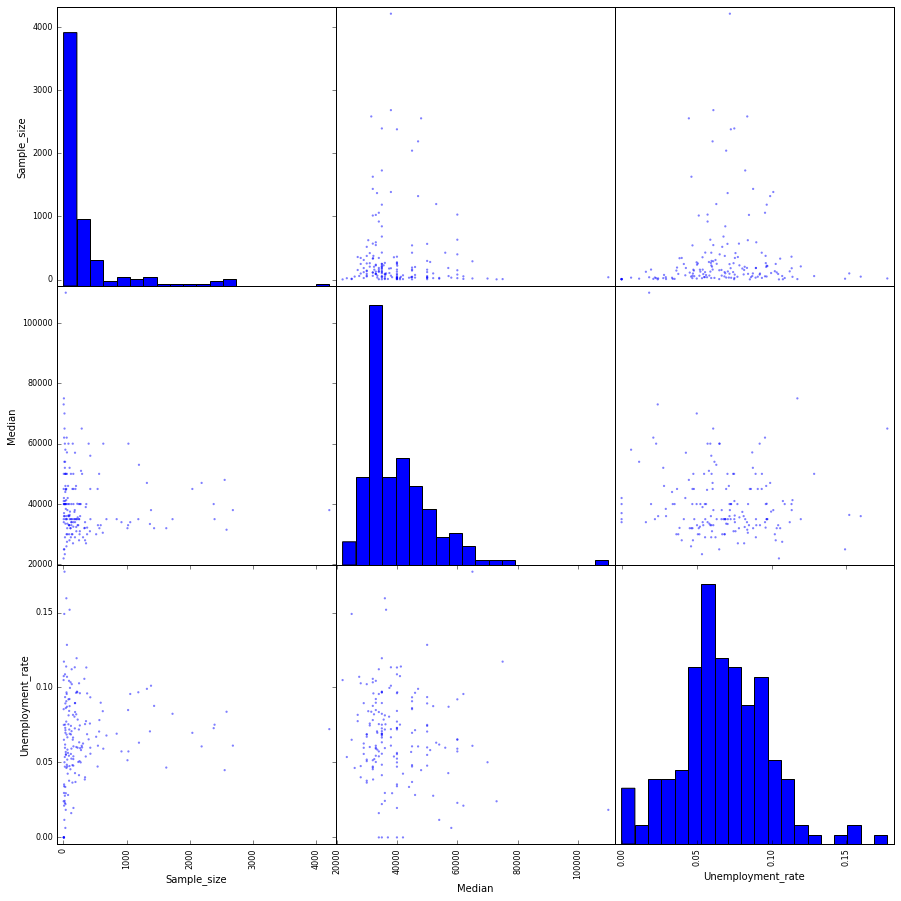

In [6]:
# Code (Scatter Matrix plots) #

pd.plotting.scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], grid=True, hist_kwds={'bins':20}, figsize=(15,15))

These scatter matrix plot combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously.

### Visualization: Bar plots in pandas

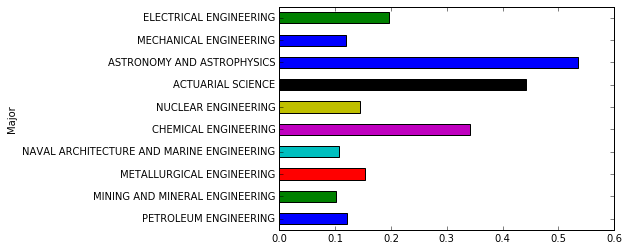

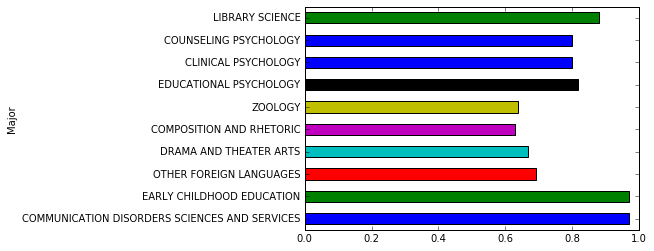

In [42]:
# Code (Bar plots) #

recent_grads[:10].plot.barh(x='Major', y='ShareWomen', legend=False)
recent_grads[-10:].plot.barh(x='Major', y='ShareWomen', legend=False)

The dataset is sorted by the median salary of the jobs. Then, looking at the first bar plot above we can see the top 10 job-revenues for each major studied and the percentage of women for that major. In the second bar plot above, we can see the last top 10 job-revenues for each major studied and the percentage of women for that major.

Analyzing the results, we can see that women are minority in the top salary professions and majority in the last salary professions. Only in _Astronomy and Astrophysics_ women reach the 50% gender ratio.

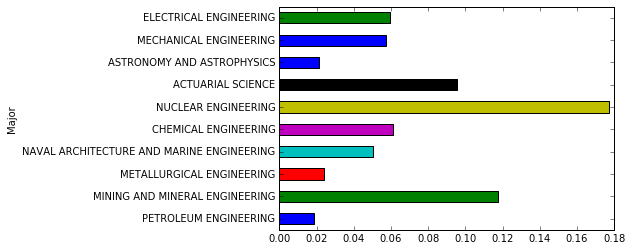

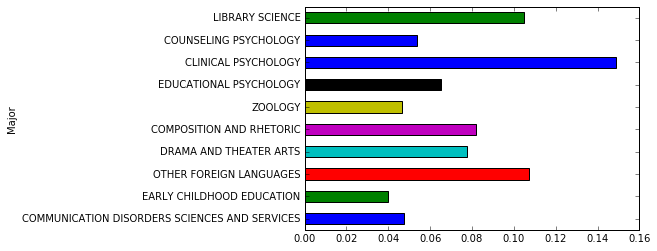

In [43]:
# Code (Bar plots) #

recent_grads[:10].plot.barh(x='Major', y='Unemployment_rate', legend=False)
recent_grads[-10:].plot.barh(x='Major', y='Unemployment_rate', legend=False)

Following the previous reasoning, on the last two bar plots we can see the unemployement rates for the top 10 salary-jobs and the last 10 salary-jobs.

There are no significant differences between the unemployement rates of these top groups, so each major has to be treated individually. We can extract that _Petroleum Engineering_, _Metallurgical Engineering_ and _Astronomy and Astrophysics_ enjoy of the lowest unemployement rates of these majors, around 2%.

Another future ideas to visualize could be:
- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

### Visualization: Grouped Bar Plots in pandas

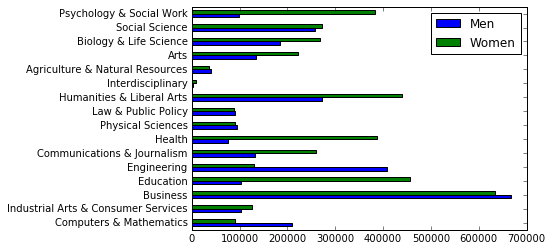

In [63]:
# Code (Comparison Men vs Women by Major_Category) #

major_categories = recent_grads.loc[:, 'Major_category'].unique()
categories_dict_men = {}
categories_dict_women = {}

for major in major_categories:
    value1 = recent_grads.loc[recent_grads.loc[:, 'Major_category'] == major, 'Men'].sum() 
    categories_dict_men[major] = value1
    value2 = recent_grads.loc[recent_grads.loc[:, 'Major_category'] == major, 'Women'].sum()
    categories_dict_women[major] = value2

major_df = pd.DataFrame.from_dict(categories_dict_men, orient='index')
major_df.columns = ['Men']
women_by_major = pd.Series(categories_dict_women)
major_df['Women'] = women_by_major

major_df.plot.barh()

From the results of the plot above, we can infer that women are majority on the fields of _Education_, _Phsychology & Social Work_, _Biology & Life Science_, _Arts_, _Health_, _Humanities_ and _Journalism_. In contrast, men are majority on fields such as _Engineering_ or _Computer & Mathematics_. 

This gap could explain the main differences between salaries per gender, as STEM jobs are usually better paid than the other ones.

### Visualization: Box Plots in pandas

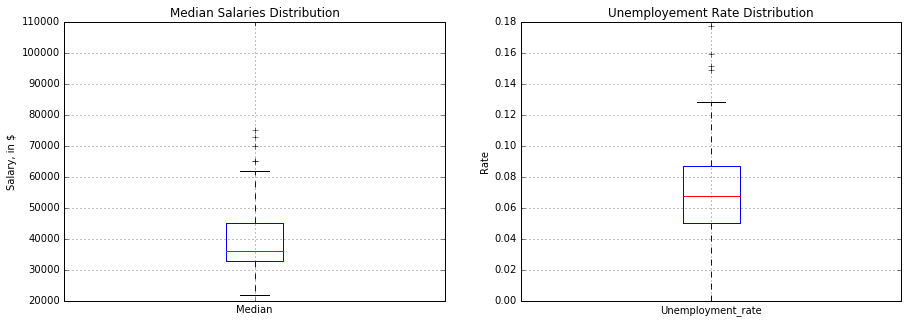

In [80]:
# Code (Distributions of median salaries and unemployment rate) #

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

recent_grads.boxplot(ax=axes[0], column=['Median'])
recent_grads.boxplot(ax=axes[1], column=['Unemployment_rate'])
axes[0].set_title('Median Salaries Distribution')
axes[0].set_ylabel('Salary, in $')
axes[1].set_title('Unemployement Rate Distribution')
axes[1].set_ylabel('Rate')

We can see the distributions of both median salarys and unemployement rates easily and identify the median values for both of them and its quartiles.

- 50% of graduates earn a salary between 32000 and 45000 dollars per year, with a median of around 35000 dollars.
- 50% of graduates have an unemployement rate of 5 to 8.5 percent, with the median being around 6.5 percent of unemployement rate.


### Visualization: Hexagonal Bin Plots in pandas

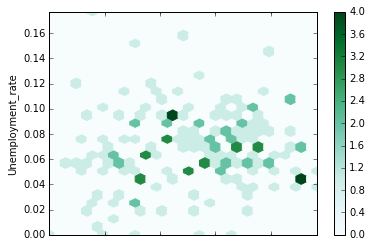

In [109]:
# Code (Hex Bin Plot to show ShareWomen vs Unemployment_rate) #

recent_grads.plot.hexbin(x='ShareWomen', y='Unemployment_rate', gridsize=25)

Scatterplots are a straightforward way to visualize the data distribution in a XY plane, especially when we are looking for trends or clusters. But when you have a dataset with a large number of points, many of these data points can overlap. This overalpping effect can make difficult to see any trends or clusters. This is what happened with the scatter plot for _ShareWomen vs Unemployement Rate_ calculated earlier.

As per the results, we can now identify that the data is grouped in majority around levels of 4 to 6 percent of unemployement rate, showing little density in many areas around this zone.